In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge

# Data Collection

In [85]:
df=pd.read_excel("premiums_young_with_gr.xlsx")

df.sample(15)


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
11721,25,Male,Southwest,Unmarried,2,Normal,No Smoking,Freelancer,<10L,1,No Disease,Bronze,8851,5
16353,22,Male,Southwest,Married,2,Underweight,No Smoking,Freelancer,10L - 25L,23,Diabetes,Bronze,7885,3
9942,18,Male,Northwest,Unmarried,1,Normal,Occasional,Freelancer,> 40L,41,No Disease,Silver,12701,5
10464,19,Male,Southeast,Unmarried,1,Normal,Regular,Freelancer,10L - 25L,19,No Disease,Bronze,8997,4
17642,22,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,<10L,1,No Disease,Bronze,8227,4
17434,22,Female,Southwest,Unmarried,0,Overweight,No Smoking,Freelancer,> 40L,41,No Disease,Gold,13089,2
18162,21,Female,Southwest,Unmarried,0,Underweight,Regular,Freelancer,<10L,2,No Disease,Bronze,9262,5
19493,19,Female,Northwest,Unmarried,1,Normal,No Smoking,Salaried,<10L,3,No Disease,Bronze,6703,3
18418,20,Male,Northwest,Unmarried,0,Normal,No Smoking,Self-Employed,<10L,7,High blood pressure,Bronze,8313,4
15640,21,Female,Northeast,Married,3,Normal,No Smoking,Salaried,<10L,5,No Disease,Silver,9567,2


# Data Manipulation

### changing the column names for linearity

In [3]:
print(df.shape)

df.columns=df.columns.str.replace(' ','_').str.lower()

print(df.columns)

(20096, 14)
Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')


### checking for null values

In [4]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

## dropping the null values

In [5]:
df.dropna(inplace=True)
print(df.shape)
print(df.isna().sum())

(20090, 14)
age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64


### checking for duplicate values and dropping them

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop_duplicates()
df.duplicated().sum()


np.int64(0)

# quick stats

In [8]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


### the above stats you can observe that the max age is 356 and the min of the number of dependencies is less than zero so we need to clean that part of the data 

### the no of dependants which are negative are 72 records

In [9]:
df[df.number_of_dependants<0].shape

(22, 14)

### making the negative values positive for the current being

In [10]:
df['number_of_dependants']=abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

## box plot for all the numeric columns

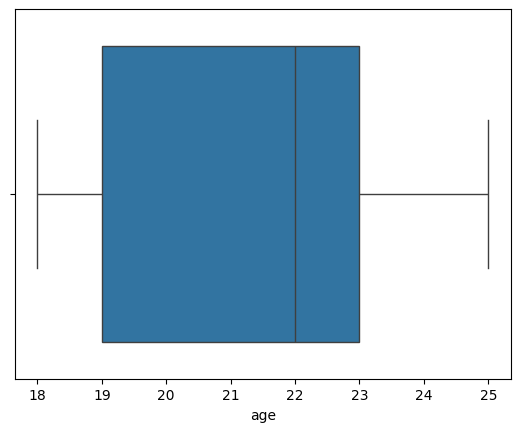

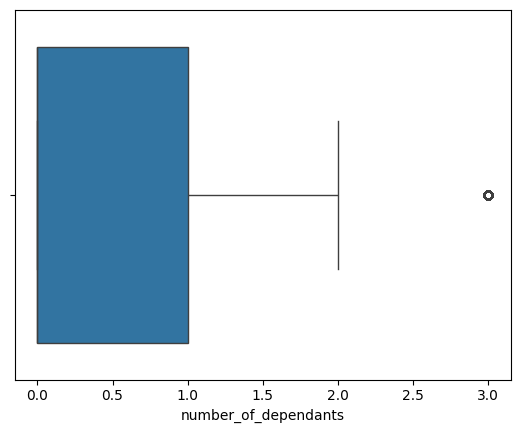

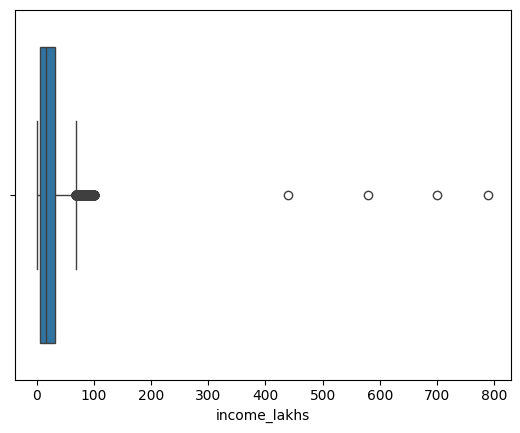

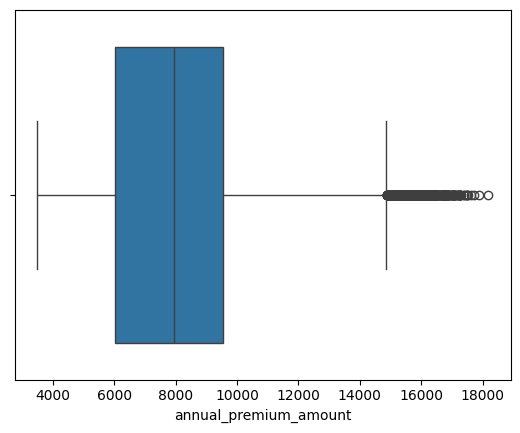

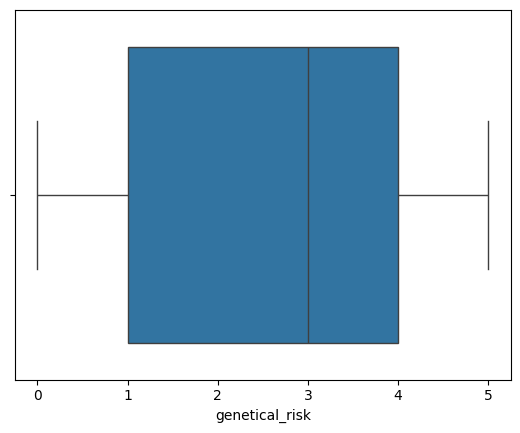

In [11]:
numeric_columns=df.select_dtypes(['float64','int64']).columns

for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

## for getting the ages correct we will drop all the rows which has age >100 and here .copy() is for a deep copy not a shallow copy

In [12]:
df1=df[df.age<=100].copy()
df1['age'].describe()

count    20090.000000
mean        21.494375
std          2.294052
min         18.000000
25%         19.000000
50%         22.000000
75%         23.000000
max         25.000000
Name: age, dtype: float64

## for detecting and treating the outliers in the income in lakhs columns we will use the iqr method 

In [174]:
df1.income_lakhs.quantile([0.25,0.75])

0.25     7.0
0.75    31.0
Name: income_lakhs, dtype: float64

### ater calculating the iqr bounds lets just manually take a threshold like 0.999 quantile and then use that threshold for removing the outliers

In [13]:
def iqr(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return lower_bound,upper_bound

iqr(df1.income_lakhs)

quantile_threshold=df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [14]:
df2=df1[df1.income_lakhs<=quantile_threshold].copy()
df2.income_lakhs.describe()

count    20086.000000
mean        22.390371
std         21.732062
min          1.000000
25%          6.000000
50%         16.000000
75%         31.000000
max        100.000000
Name: income_lakhs, dtype: float64

# plotting the histogram for all the numeric columsn

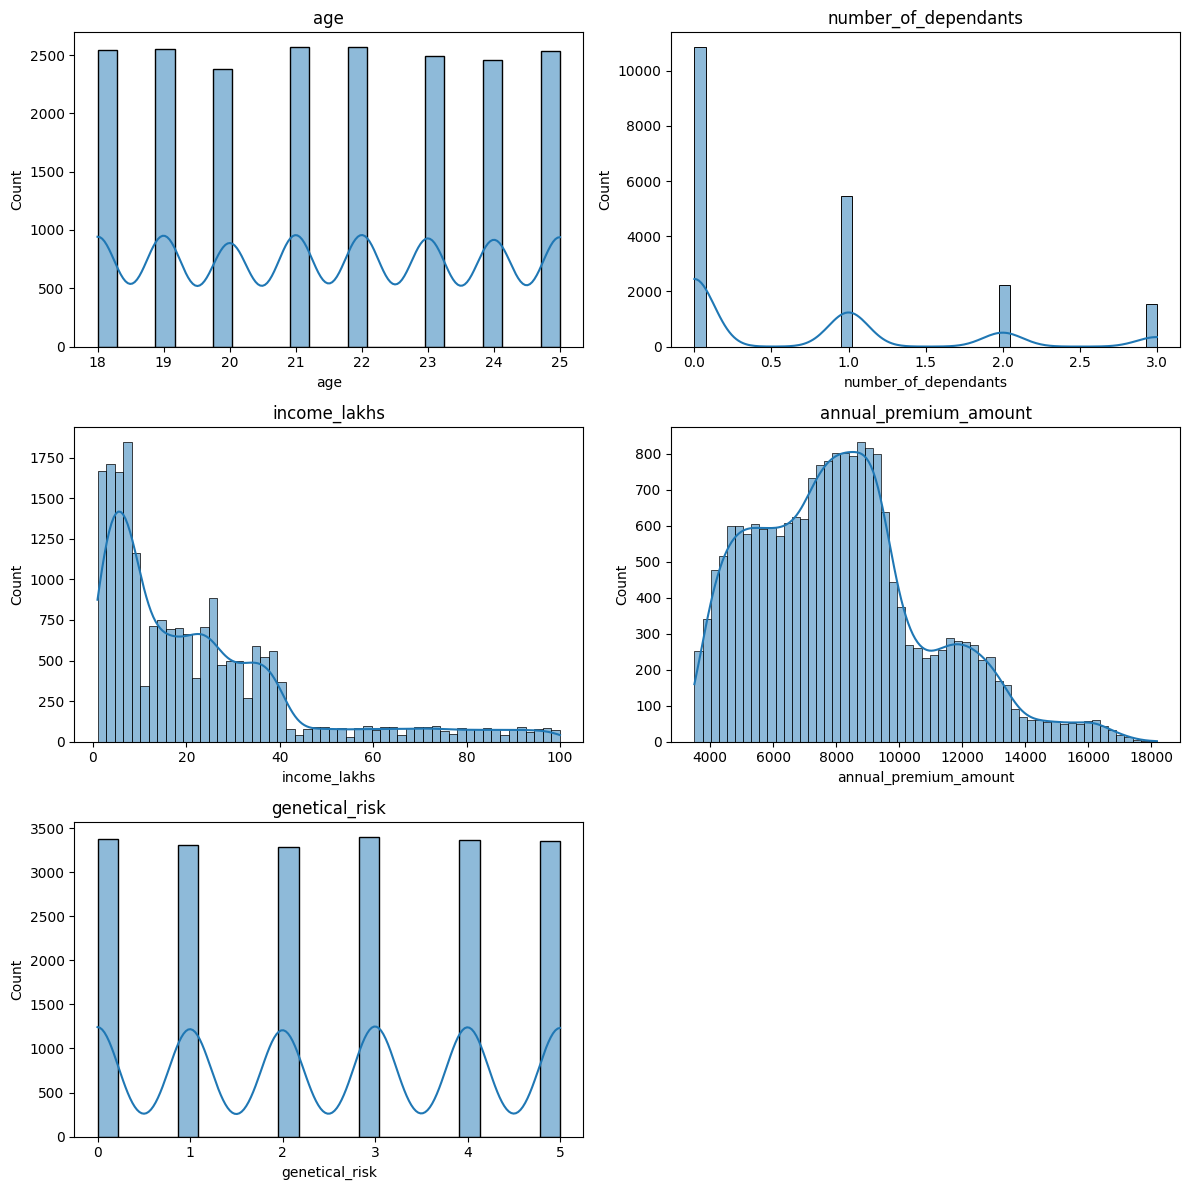

In [15]:
import math
n = len(numeric_columns)
rows = math.ceil(n / 2)

fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df2[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


# plotting scatter for the bivariate analysis

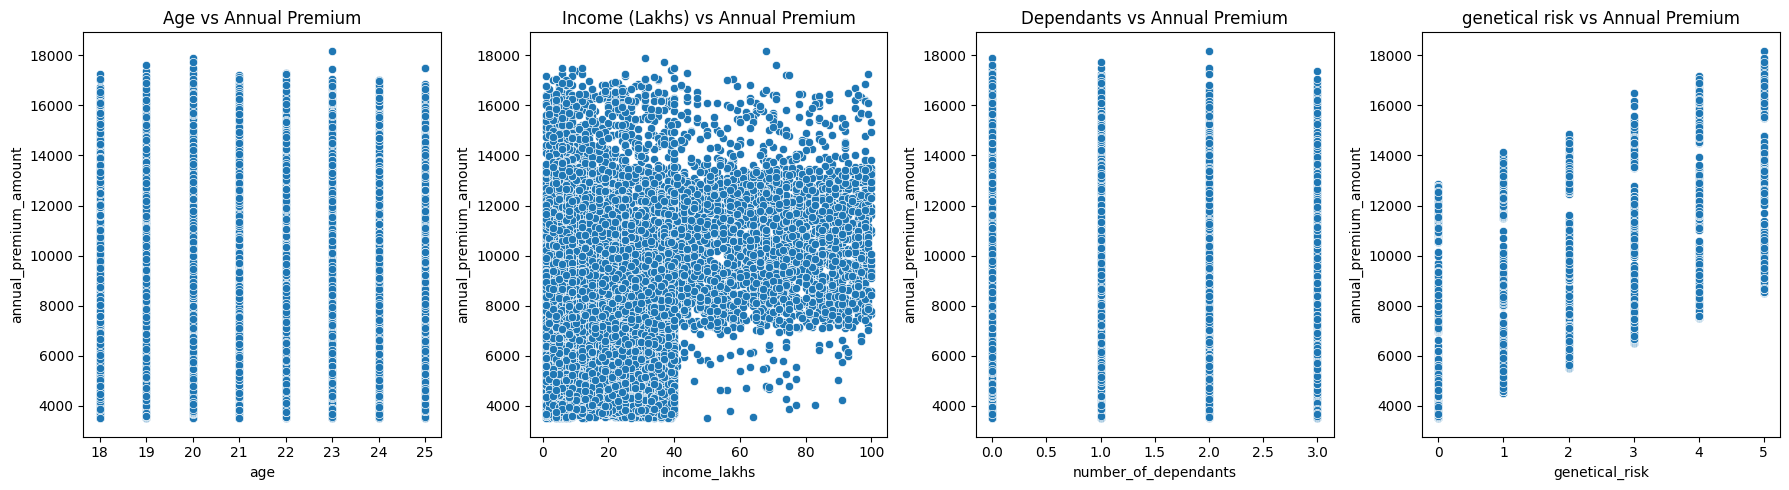

In [49]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

sns.scatterplot(
    data=df2,
    x="age",
    y="annual_premium_amount",
    ax=axes[0]
)
axes[0].set_title("Age vs Annual Premium")

sns.scatterplot(
    data=df2,
    x="income_lakhs",
    y="annual_premium_amount",
    ax=axes[1]
)
axes[1].set_title("Income (Lakhs) vs Annual Premium")

sns.scatterplot(
    data=df2,
    x="number_of_dependants",
    y="annual_premium_amount",
    ax=axes[2]
)
axes[2].set_title("Dependants vs Annual Premium")

sns.scatterplot(
    data=df2,
    x="genetical_risk",
    y="annual_premium_amount",
    ax=axes[3]
)
axes[3].set_title("genetical risk vs Annual Premium")

plt.tight_layout()
plt.show()


# Categorical Analysis

In [18]:
categorical_columns=df.select_dtypes(['object']).columns
print(categorical_columns)

for col in categorical_columns:
    print(f"col:{col} values:{df[col].unique()}\n")


Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')
col:gender values:['Male' 'Female']

col:region values:['Northeast' 'Northwest' 'Southeast' 'Southwest']

col:marital_status values:['Unmarried' 'Married']

col:bmi_category values:['Overweight' 'Underweight' 'Normal' 'Obesity']

col:smoking_status values:['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']

col:employment_status values:['Self-Employed' 'Freelancer' 'Salaried']

col:income_level values:['> 40L' '<10L' '10L - 25L' '25L - 40L']

col:medical_history values:['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']

col:insurance_plan values:['Silver' 'Bronze' 'Gold']



# Changing the column names 

In [19]:
df2['smoking_status'].replace(
    {
      'Smoking=0':"No Smoking",
      'Does Not Smoke':"No Smoking",
      "Not Smoking":"No Smoking"
    },
    inplace=True
)

df2['smoking_status'].unique()

/tmp/ipykernel_298502/2424388232.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace(


array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [20]:
pd_ct=df2['gender'].value_counts(normalize=True)
pd_ct

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64

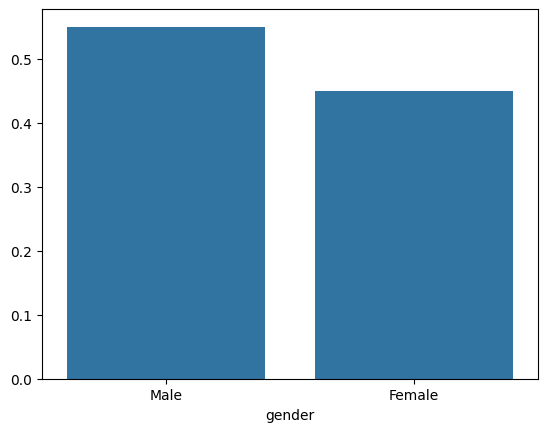

In [21]:
sns.barplot(x=pd_ct.index,y=pd_ct.values)
plt.show()

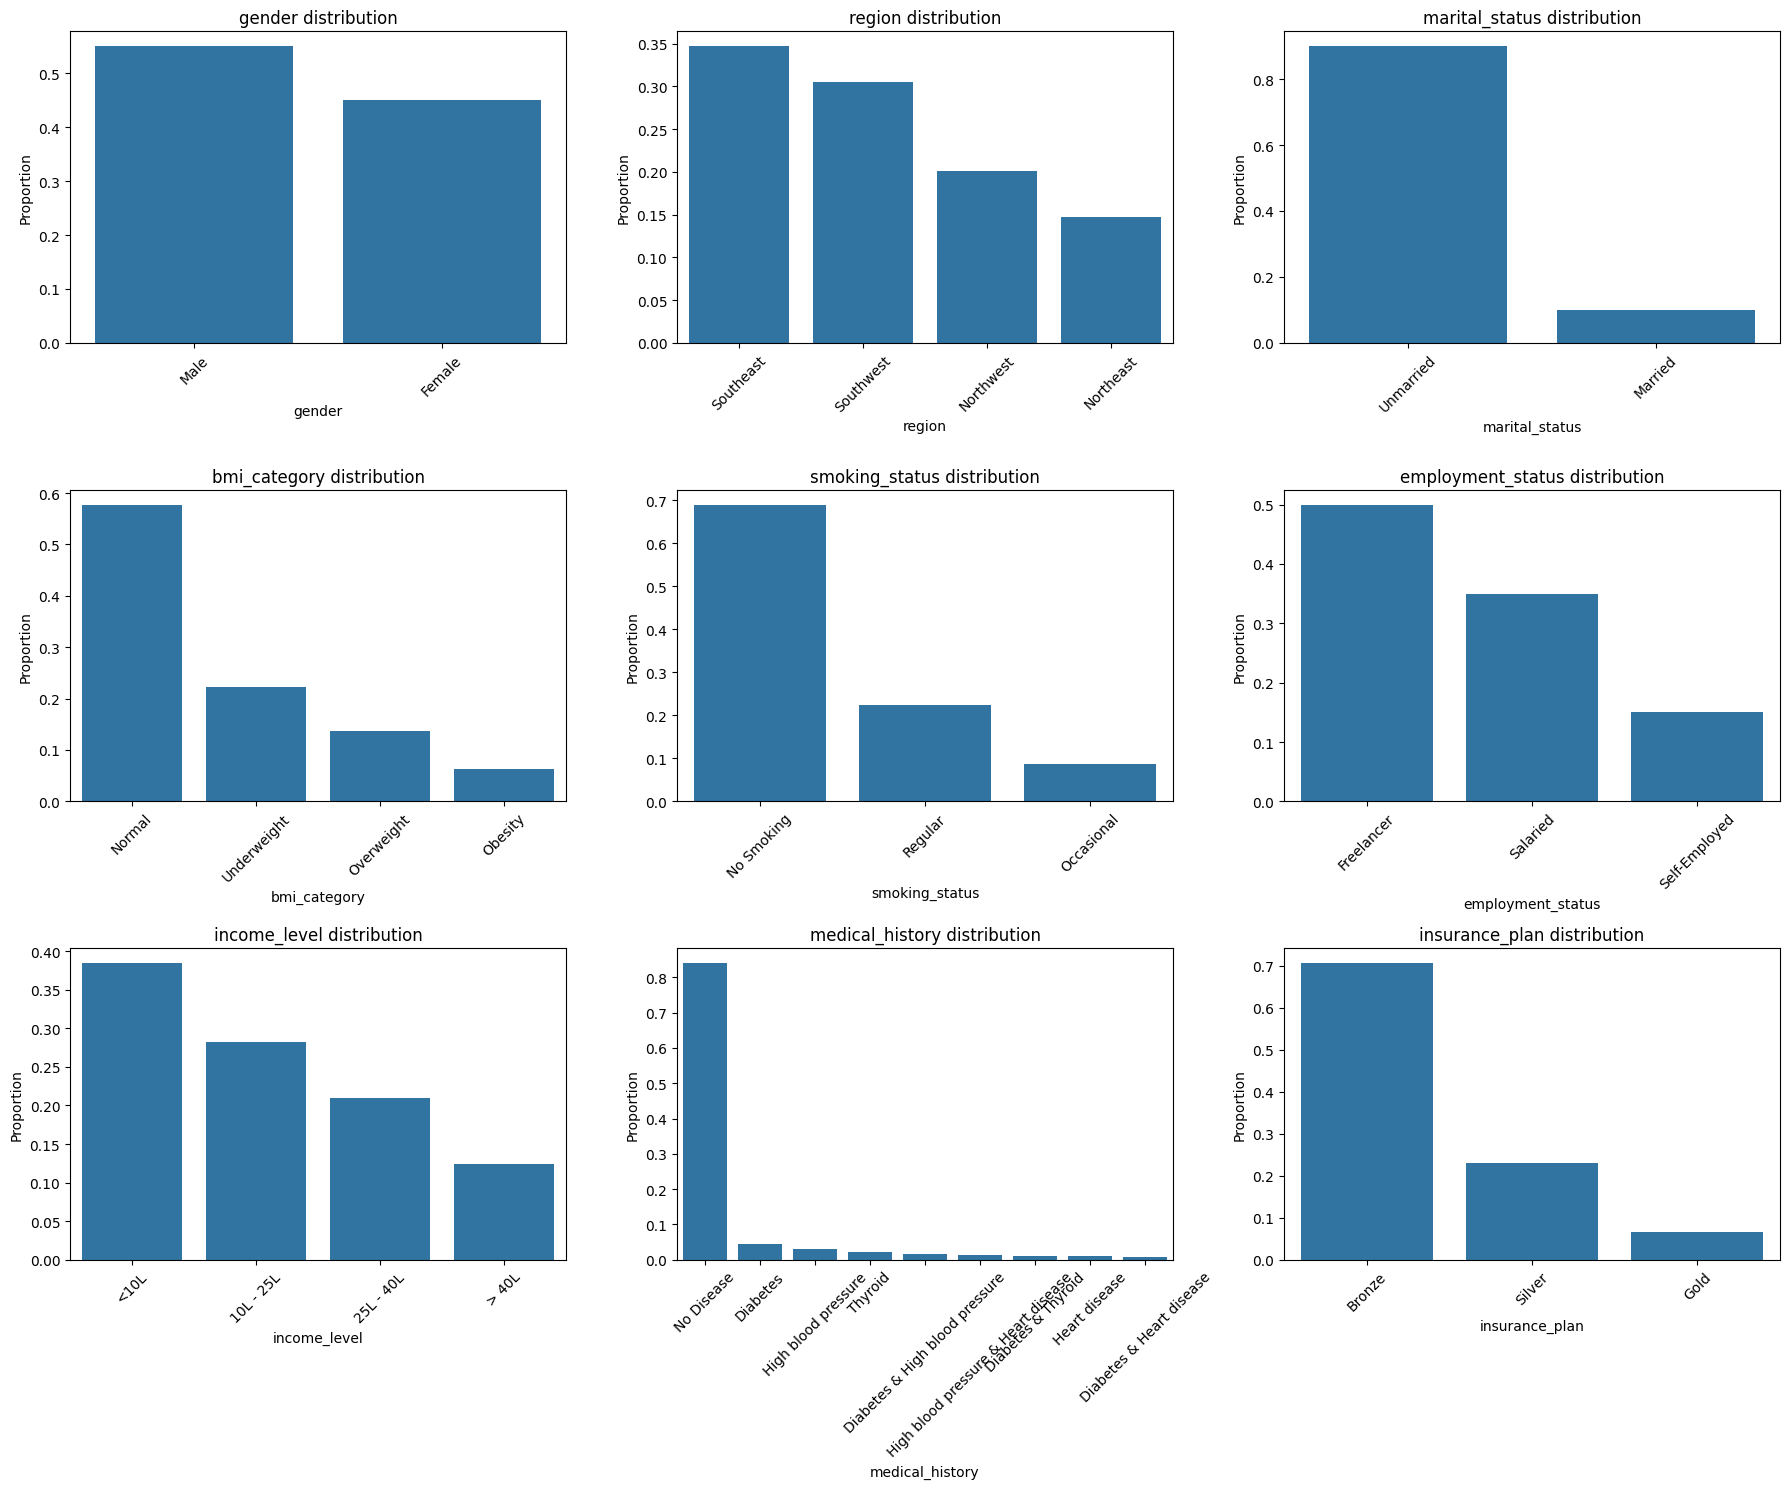

In [22]:
categorical_cols = [
    'gender',
    'region',
    'marital_status',
    'bmi_category',
    'smoking_status',
    'employment_status',
    'income_level',
    'medical_history',
    'insurance_plan'
]

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    pd_ct = df2[col].value_counts(normalize=True)

    sns.barplot(
        x=pd_ct.index,
        y=pd_ct.values,
        ax=axes[i]
    )

    axes[i].set_title(f"{col} distribution")
    axes[i].set_ylabel("Proportion")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

# remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


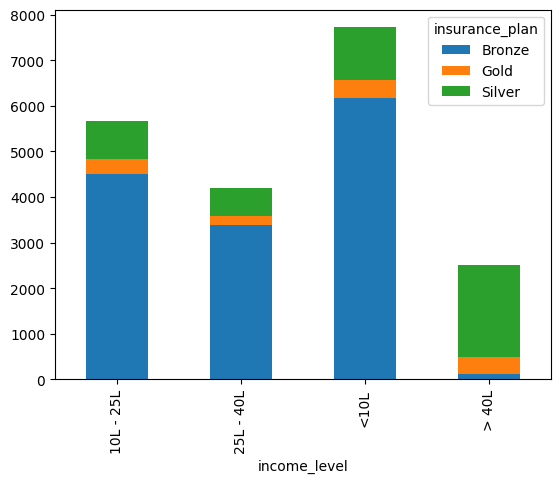

In [23]:
cross_plan=pd.crosstab(df2['income_level'],df2['insurance_plan'])
print(cross_plan)


cross_plan.plot(kind="bar",stacked=True)
plt.show()


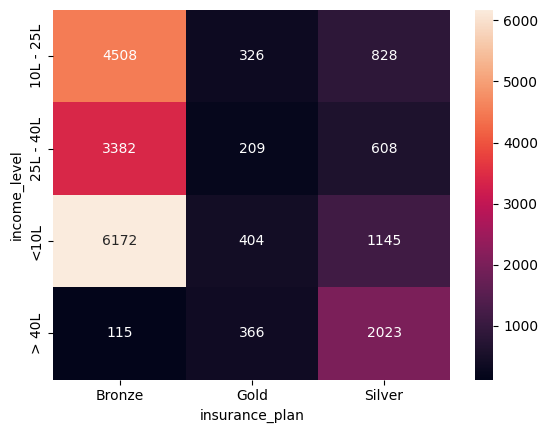

In [24]:
sns.heatmap(cross_plan,annot=True,fmt='d')
plt.show()

In [25]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [83]:
categorical_columns=df2.select_dtypes(['object']).columns
print(categorical_columns)
print(df2.columns)
print(df2['insurance_plan'].unique())
for col in df2.columns:
    print(f"col:{col} values:{df2[col].unique()}\n")


Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'medical_history', 'disease1', 'disease2'],
      dtype='object')
Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk', 'disease1', 'disease2',
       'total_risk_score', 'normalized_risk_score'],
      dtype='object')
[1 0 2]
col:age values:[18 22 21 25 20 19 23 24]

col:gender values:['Male' 'Female']

col:region values:['Northeast' 'Northwest' 'Southeast' 'Southwest']

col:marital_status values:['Unmarried' 'Married']

col:number_of_dependants values:[0 2 1 3]

col:bmi_category values:['Overweight' 'Underweight' 'Normal' 'Obesity']

col:smoking_status values:['Regular' 'No Smoking' 'Occasional']

col:employment_status values:['Self-Employed' 'Freelancer' 'Salaried']

col:

# feature engineering

In [26]:
df2['medical_history'].unique()

risk_scores={
     "diabetes":6,
      "heart disease":8,
      "high blood pressure":6,
      "thyroid":5,
      "no disease":0,
      "none":0
}

df2[['disease1','disease2']]=df2['medical_history'].str.split(" & ",expand=True).apply(lambda x:x.str.lower())

df2.head()

print(df2['disease1'].unique())
df2['disease2'].unique()

['high blood pressure' 'no disease' 'diabetes' 'heart disease' 'thyroid']


array([None, 'high blood pressure', 'heart disease', 'thyroid'],
      dtype=object)

In [27]:
df2.loc[:, ['disease1', 'disease2']] = df2[['disease1','disease2']].fillna("none")


df2['total_risk_score']=0

for disease in ['disease1','disease2']:
     df2['total_risk_score']+=df2[disease].map(risk_scores)
    
min_score=df2['total_risk_score'].min()
max_score=df2['total_risk_score'].max()

df2['normalized_risk_score']=((df2['total_risk_score']-min_score)/(max_score-min_score))
df2.sample(15)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
7613,19,Female,Southwest,Unmarried,1,Overweight,No Smoking,Salaried,10L - 25L,21,No Disease,Bronze,4691,0,no disease,none,0,0.000000
8435,24,Female,Southwest,Unmarried,2,Normal,No Smoking,Freelancer,<10L,2,Thyroid,Bronze,9580,5,thyroid,none,5,0.357143
705,22,Male,Northeast,Unmarried,1,Normal,Regular,Freelancer,<10L,4,No Disease,Bronze,9900,5,no disease,none,0,0.000000
7233,18,Female,Northwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,71,No Disease,Silver,7274,0,no disease,none,0,0.000000
13047,25,Female,Southeast,Married,3,Normal,No Smoking,Freelancer,<10L,8,No Disease,Bronze,3938,0,no disease,none,0,0.000000
14242,23,Male,Southeast,Unmarried,2,Normal,Regular,Salaried,<10L,3,No Disease,Bronze,5372,1,no disease,none,0,0.000000
13829,22,Male,Southeast,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,33,No Disease,Bronze,6250,2,no disease,none,0,0.000000
15222,18,Male,Southwest,Unmarried,1,Normal,Regular,Salaried,<10L,2,High blood pressure & Heart disease,Silver,13904,5,high blood pressure,heart disease,14,1.000000
2734,20,Female,Southwest,Unmarried,0,Normal,Occasional,Freelancer,10L - 25L,24,No Disease,Bronze,9304,5,no disease,none,0,0.000000
10214,19,Female,Southeast,Unmarried,0,Underweight,Regular,Freelancer,25L - 40L,35,No Disease,Bronze,8780,4,no disease,none,0,0.000000


In [28]:
df2['insurance_plan']=df2['insurance_plan'].map({"Bronze":0,"Silver":1,"Gold":2})

df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,1,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,1,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,1,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,0,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,0,5712,1,no disease,none,0,0.000000


In [29]:
df2['income_level']=df2['income_level'].map({'<10L':0,'10L - 25L':1,"> 40L":3,"25L - 40L":2})

df2['income_level'].unique()

array([3, 0, 1, 2])

In [30]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,3,99,High blood pressure,1,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,0,3,No Disease,1,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,3,97,No Disease,1,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,1,15,No Disease,0,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,1,14,No Disease,0,5712,1,no disease,none,0,0.000000


In [31]:
nominal_cols=['gender','region','marital_status','bmi_category','smoking_status','employment_status']

df3=pd.get_dummies(df2,columns=nominal_cols,drop_first=True,dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,High blood pressure,1,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,0,3,No Disease,1,11050,3,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,3,97,No Disease,1,11857,4,no disease,none,...,1,0,1,0,0,0,0,1,1,0
3,25,0,1,15,No Disease,0,5684,2,no disease,none,...,1,0,1,0,0,0,0,0,0,0
4,20,2,1,14,No Disease,0,5712,1,no disease,none,...,1,0,1,0,1,0,0,0,0,0


In [32]:
df3.drop(['medical_history','disease1','disease2'],axis=1,inplace=True)

In [33]:
df3.drop('total_risk_score',axis=1,inplace=True)

In [34]:
df3.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,1,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,0,3,1,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,3,97,1,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,1,15,0,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,1,14,0,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


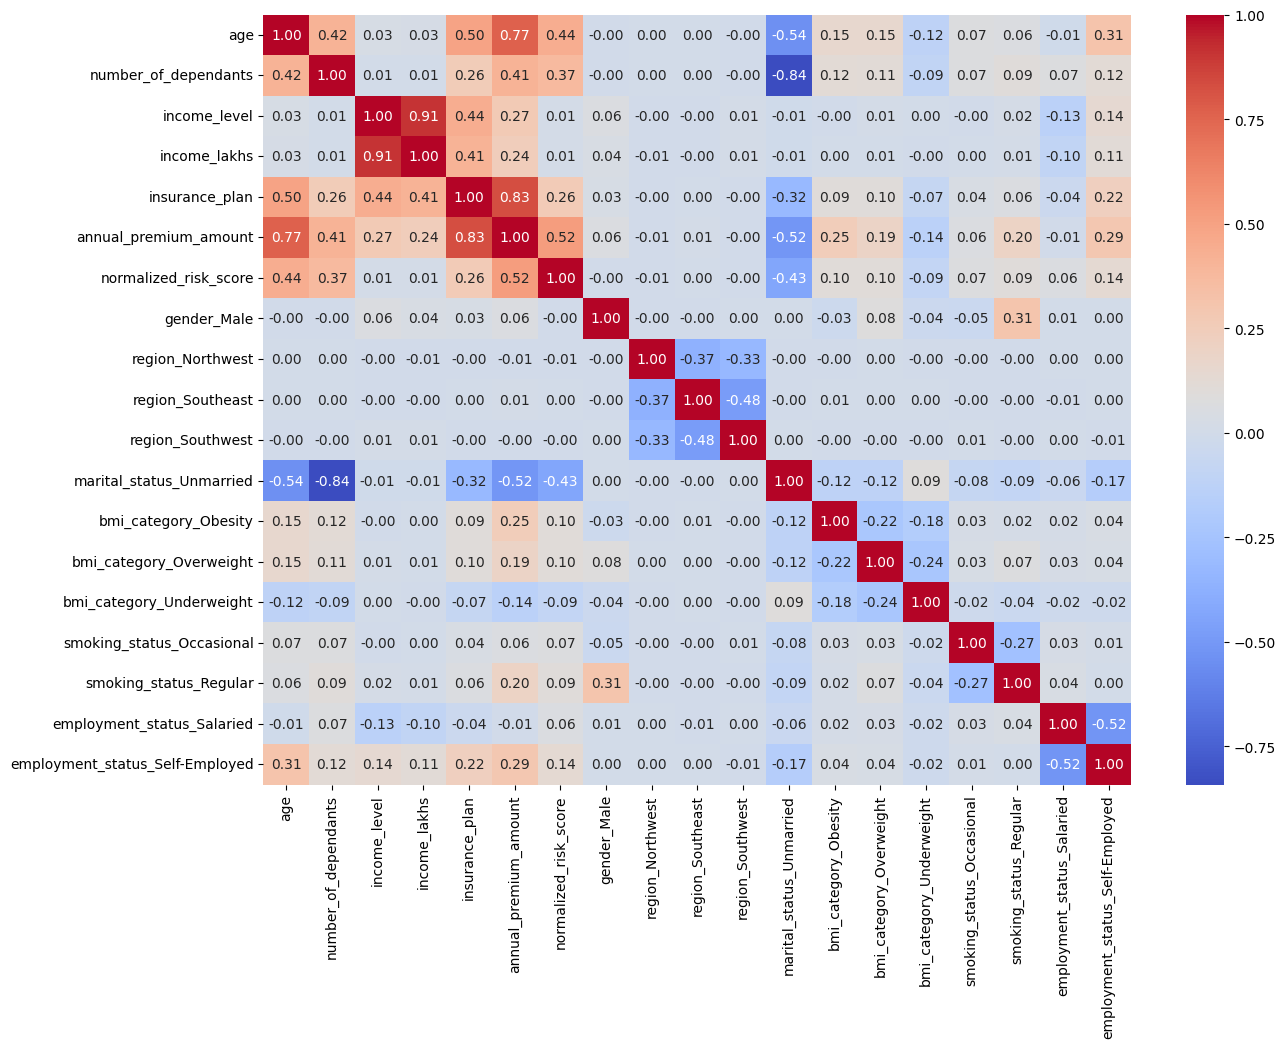

In [197]:
crr=df3.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(crr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [35]:
df3.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,1,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,0,3,1,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,3,97,1,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,1,15,0,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,1,14,0,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

cols_scale=['age','income_lakhs','number_of_dependants','insurance_plan','income_level','genetical_risk']

X=df3.drop("annual_premium_amount",axis=1)
y=df3['annual_premium_amount']

X[cols_scale]=scaler.fit_transform(X[cols_scale])

In [38]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['variable']=data.columns
    vif_df['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

calculate_vif(X)

,variable,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalized_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [40]:
calculate_vif(X.drop('income_level',axis=1))

,variable,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [41]:
X_final=X.drop('income_level',axis=1)

# MODEL TRAINING AND FINE TUNING

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.3,random_state=42)

print(f"X train shape:{X_train.shape}")
print(f"X train shape:{X_test.shape}")
print(f"X train shape:{y_train.shape}")
print(f"X train shape:{y_test.shape}")


X train shape:(14060, 18)
X train shape:(6026, 18)
X train shape:(14060,)
X train shape:(6026,)


In [43]:
model=LinearRegression()
model.fit(X_train,y_train)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
train_score,test_score

(0.9884990017445308, 0.9882609305654483)

In [44]:
X_test.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
10489,0.428571,1.0,0.080808,0.0,0.2,0.428571,1,0,0,0,0,0,0,0,0,0,0,0
7989,0.714286,0.0,0.030303,0.0,0.8,1.000000,1,0,0,1,1,0,0,0,0,0,0,0
3113,0.142857,0.0,0.363636,0.0,0.0,1.000000,1,0,0,1,1,0,0,0,0,1,1,0
10605,0.428571,0.0,0.515152,0.5,0.8,0.428571,1,0,1,0,1,0,1,0,0,0,0,0
4204,0.000000,0.0,0.222222,0.0,0.0,0.000000,0,0,1,0,1,0,0,1,0,1,0,0


In [45]:
print(model.intercept_)

model.coef_

3973.485873613313


array([-1.05801891e-01,  2.01069306e+01, -1.18192939e+01,  6.99564576e+03,
        4.98367534e+03,  1.13118985e+03,  6.08209851e+00,  1.91642829e+00,
        2.07974087e+00,  8.29849020e+00,  1.42155309e+01,  8.01977884e+02,
        4.04437286e+02,  1.13743592e+02,  2.07656492e+02,  6.07368444e+02,
        7.08985789e+00,  9.30425482e+00])

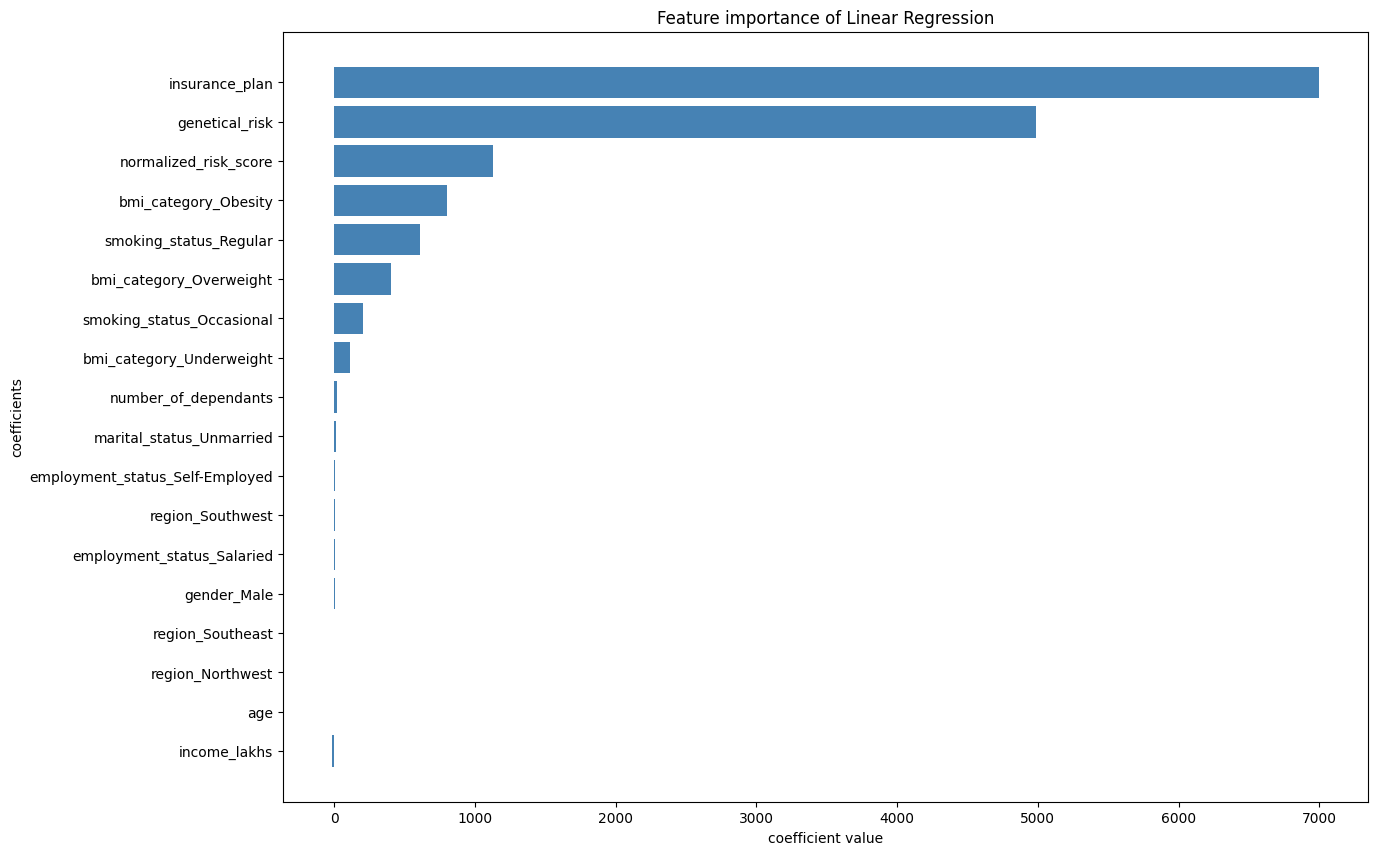

,Coeffiecients
income_lakhs,-11.819294
age,-0.105802
region_Northwest,1.916428
region_Southeast,2.079741
gender_Male,6.082099
employment_status_Salaried,7.089858
region_Southwest,8.298490
employment_status_Self-Employed,9.304255
marital_status_Unmarried,14.215531
number_of_dependants,20.106931


In [46]:
feature_importance=model.coef_

coef_df=pd.DataFrame(feature_importance,index=X_test.columns,columns=['Coeffiecients'])
coef_df=coef_df.sort_values(by="Coeffiecients",ascending=True)



plt.figure(figsize=(14,10))
plt.barh(coef_df.index,coef_df['Coeffiecients'],color='steelblue')
plt.title("Feature importance of Linear Regression")
plt.xlabel("coefficient value")
plt.ylabel("coefficients")
plt.show()


coef_df

In [50]:
model_rg=Ridge(alpha=5)
model_rg.fit(X_train,y_train)
train_score=model_rg.score(X_train,y_train)
test_score=model_rg.score(X_test,y_test)
train_score,test_score

(0.9884840165692809, 0.9882275471762074)

In [51]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor()
model_xgb.fit(X_train,y_train)
train_score=model_xgb.score(X_train,y_train)
test_score=model_xgb.score(X_test,y_test)
train_score,test_score

(0.9926241040229797, 0.9874040484428406)

### mse and rmse for linear regression

In [52]:
from sklearn.metrics import mean_squared_error

y_pred=model.predict(X_test)

mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(f"MSE-->{mse}   RMSE-->{rmse}\n")

MSE-->89439.73145260871   RMSE-->299.0647613019774



### mse and rmse for RIDGE

In [53]:
y_pred=model_rg.predict(X_test)

mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(f"MSE-->{mse}   RMSE-->{rmse}\n")

MSE-->89694.0788167956   RMSE-->299.4896973466627



### mse and rmse for XGBRegressor

In [54]:
y_pred=model_xgb.predict(X_test)

mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(f"MSE-->{mse}   RMSE-->{rmse}\n")

MSE-->95968.5   RMSE-->309.78783061960326



## preforming randomized search cv

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid={
#      "n_estimators":[20,30,40],
#      "learning_rate":[0.01,0.1,0.2],
#      "max_depth":[3,4,5]
# }

# randomS_model=RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2',random_state=10)
# randomS_model.fit(X_train,y_train)
# randomS_model.best_score_


np.float64(0.9873205224672953)

In [ ]:
# randomS_model.best_params_

{'n_estimators': 20, 'max_depth': 5, 'learning_rate': 0.2}

In [56]:
best_model=model

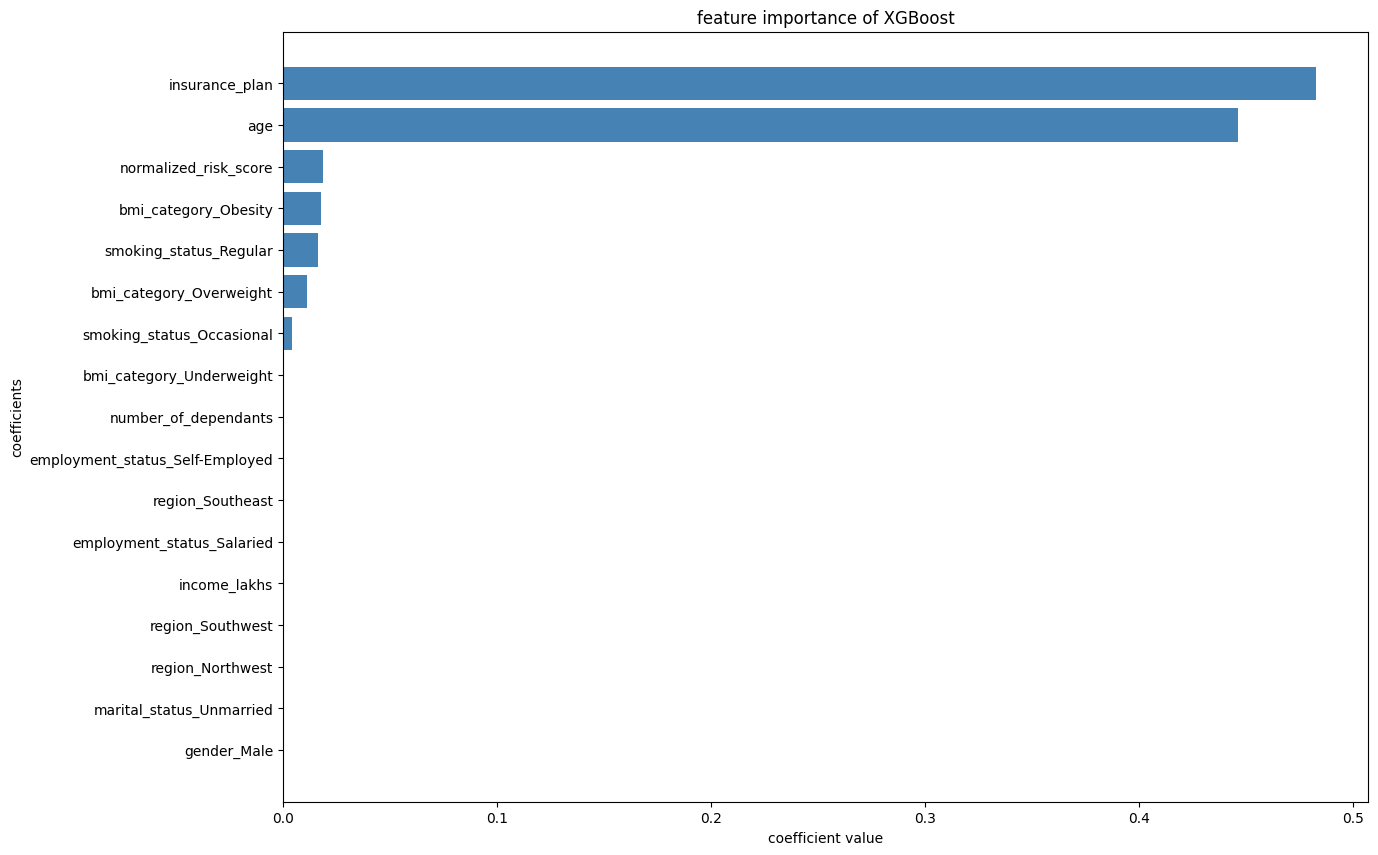

,Coeffiecients
gender_Male,0.000000
marital_status_Unmarried,0.000092
region_Northwest,0.000139
region_Southwest,0.000140
income_lakhs,0.000186
employment_status_Salaried,0.000198
region_Southeast,0.000226
employment_status_Self-Employed,0.000245
number_of_dependants,0.000401
bmi_category_Underweight,0.000630


In [ ]:
# feature_importance=best_model.feature_importances_

# coef_df=pd.DataFrame(feature_importance,index=X_test.columns,columns=['Coeffiecients'])
# coef_df=coef_df.sort_values(by="Coeffiecients",ascending=True)



# plt.figure(figsize=(14,10))
# plt.barh(coef_df.index,coef_df['Coeffiecients'],color='steelblue')
# plt.title("feature importance of XGBoost")
# plt.xlabel("coefficient value")
# plt.ylabel("coefficients")
# plt.show()

# coef_df

# ERROR ANALYSIS

In [57]:
y_pred=best_model.predict(X_test)

residual=y_pred-y_test
residual_pct=(residual*100)/y_test

results_df=pd.DataFrame(
     {
        'actual':y_test,
        'predicted':y_pred,
        'residual':residual,
        'residual_percentage':residual_pct
   }
)

<Axes: xlabel='residual_percentage', ylabel='Count'>

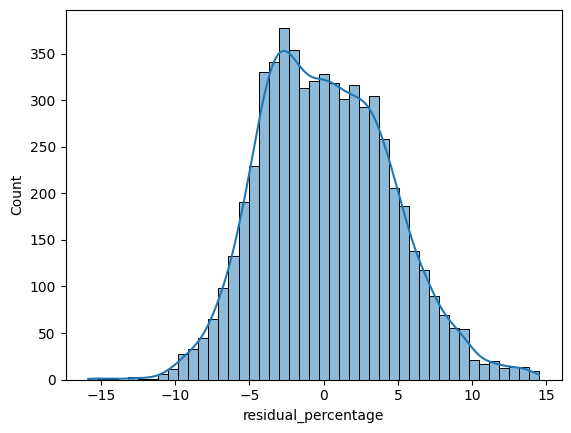

In [58]:
sns.histplot(results_df['residual_percentage'],kde=True)

In [59]:
extreme_results_df=results_df[np.abs(results_df.residual_percentage>10)]
extreme_pct=(extreme_results_df.shape[0]*100)/results_df.shape[0]

print(results_df.shape)
print(extreme_results_df.shape)

print(f"the percentage of extreme error are {extreme_pct}")

(6026, 4)
(101, 4)
the percentage of extreme error are 1.676070361765682


In [60]:
extreme_results_df2=results_df[np.abs(results_df.residual_percentage>50)]
extreme_pct2=(extreme_results_df2.shape[0]*100)/results_df.shape[0]

print(extreme_results_df2.shape)
extreme_pct2

extreme_results_df2.sort_values(by='residual_percentage',ascending=False)

(0, 4)


,actual,predicted,residual,residual_percentage


In [63]:
extreme_errors_df=X_test.loc[extreme_results_df.index]

extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
4204,0.000000,0.000000,0.222222,0.0,0.0,0.000000,0,0,1,0,1,0,0,1,0,1,0,0
13142,0.571429,0.666667,0.070707,0.0,0.0,0.428571,0,0,0,1,0,0,0,0,1,0,1,0
7802,0.857143,1.000000,0.020202,0.0,0.0,0.357143,1,0,1,0,0,0,0,1,0,0,0,0
9881,0.714286,0.000000,0.040404,0.0,0.0,0.000000,1,0,0,0,1,0,1,0,0,0,1,0
18329,1.000000,0.000000,0.030303,0.0,0.2,0.000000,0,0,1,0,1,0,0,1,0,0,1,0


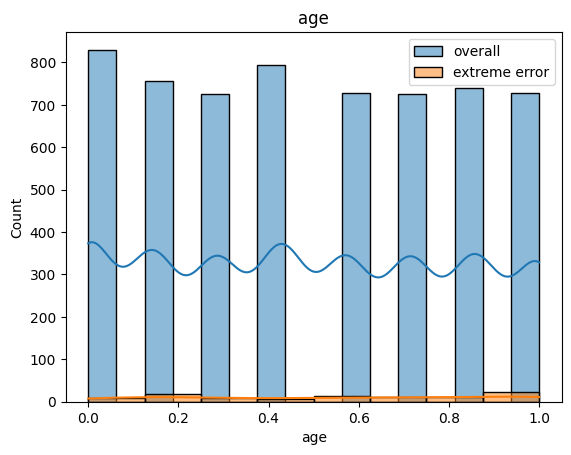

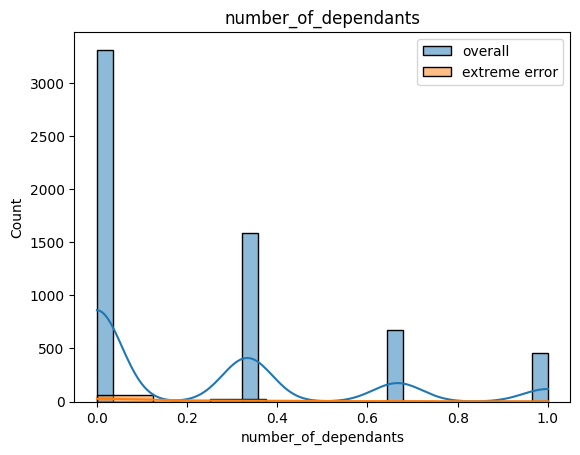

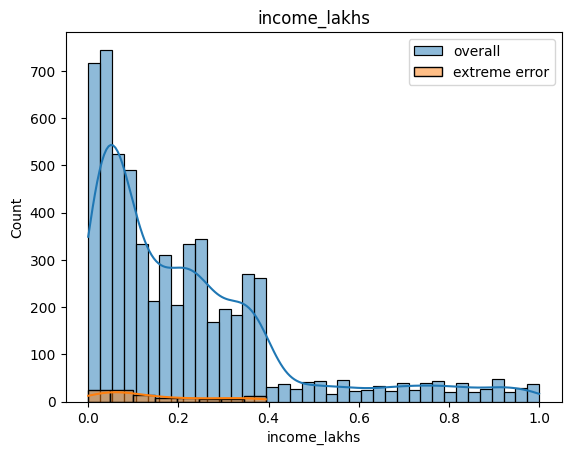

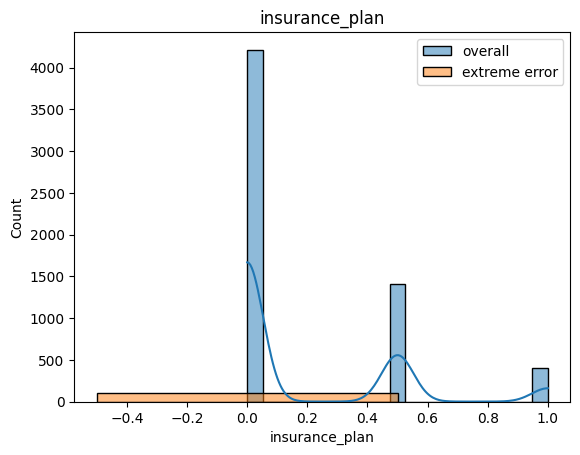

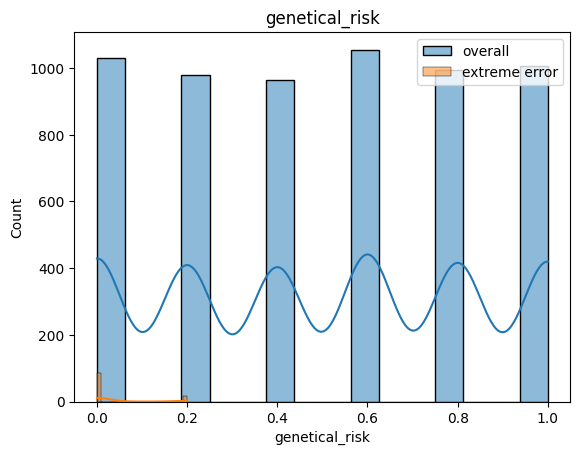

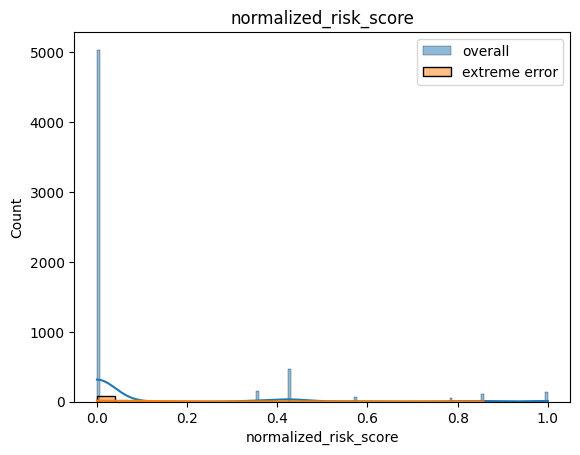

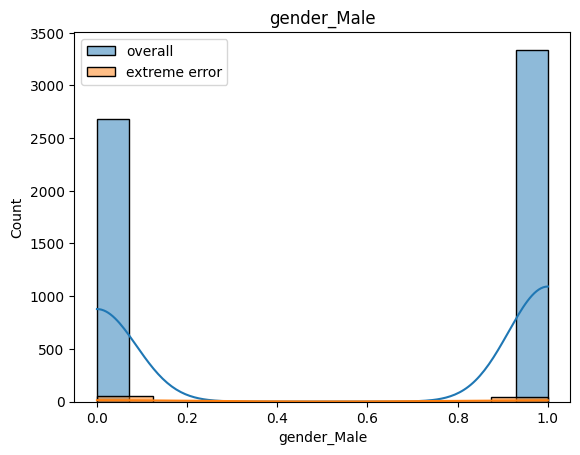

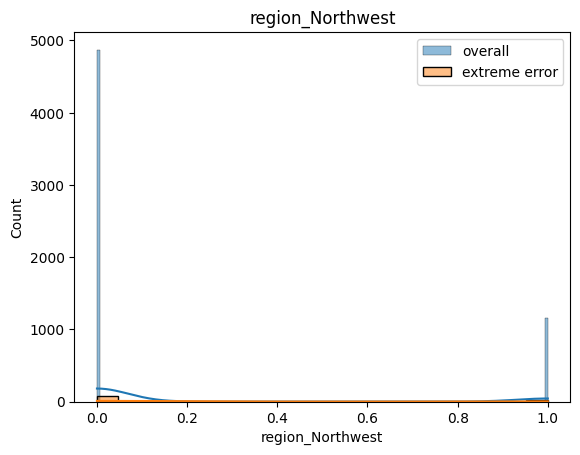

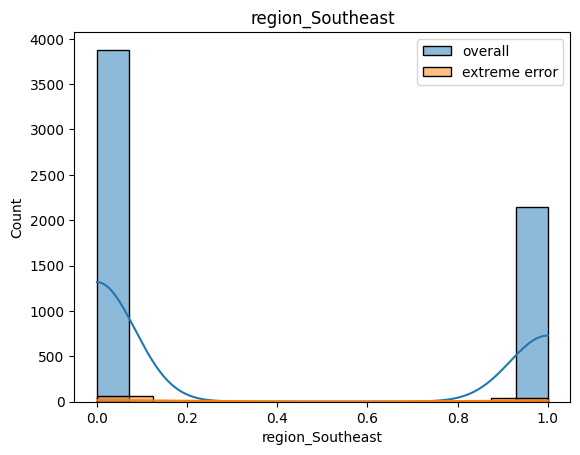

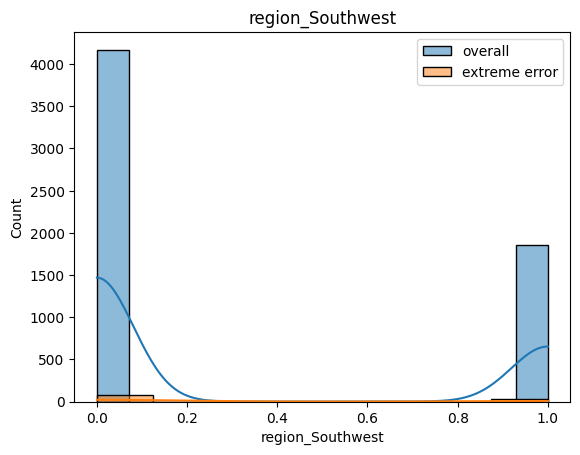

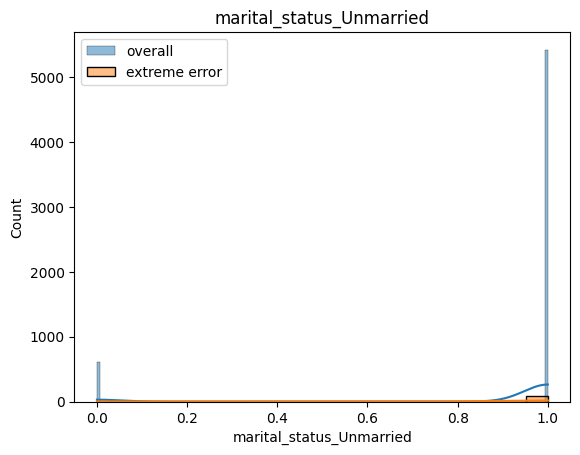

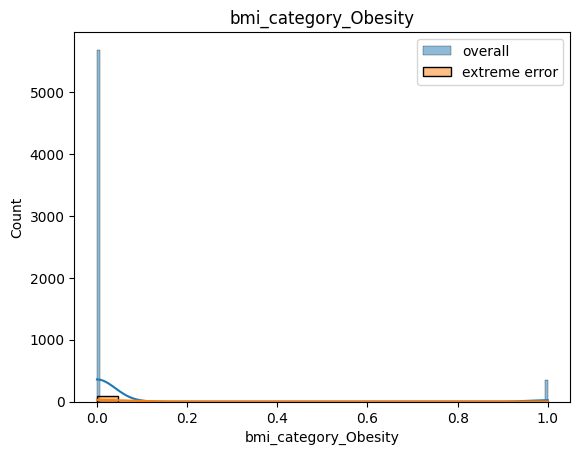

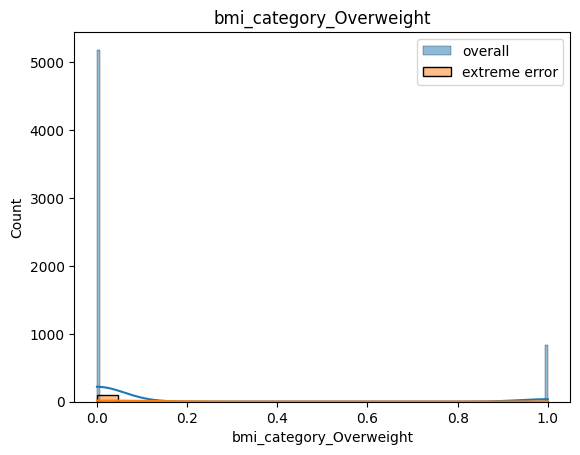

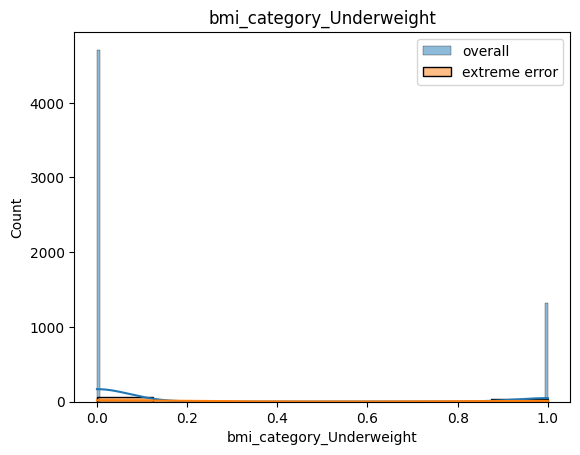

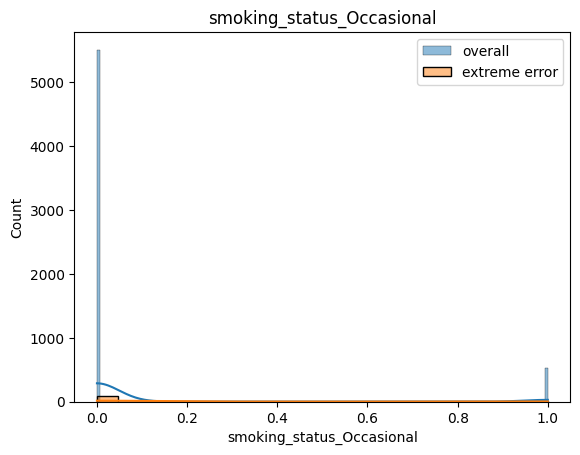

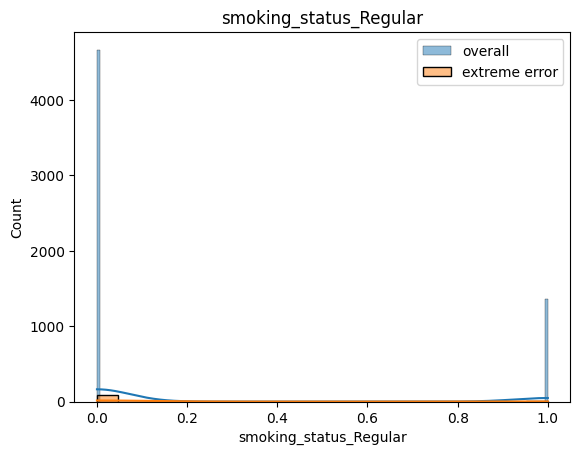

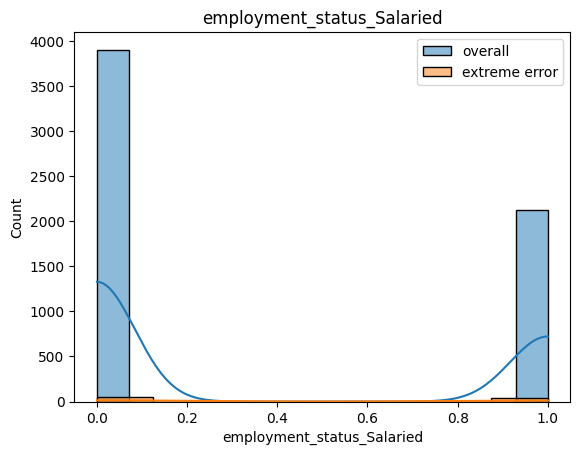

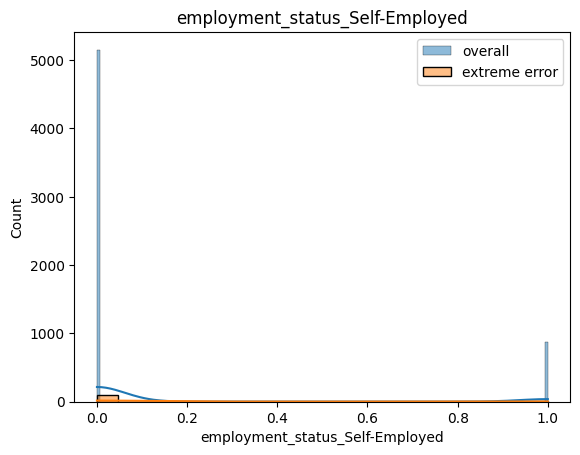

In [64]:
for feature in X_test.columns:
    sns.histplot(X_test[feature],label="overall",kde=True)
    sns.histplot(extreme_errors_df[feature],label="extreme error",kde=True)
    plt.legend()
    plt.title(f"{feature}")
    plt.show()

In [66]:
cols_scale

['age',
 'income_lakhs',
 'number_of_dependants',
 'insurance_plan',
 'income_level',
 'genetical_risk']

In [67]:
extreme_errors_df['income_level']=-1
extreme_errors_df

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed,income_level
4204,0.000000,0.000000,0.222222,0.0,0.0,0.000000,0,0,1,0,1,0,0,1,0,1,0,0,-1
13142,0.571429,0.666667,0.070707,0.0,0.0,0.428571,0,0,0,1,0,0,0,0,1,0,1,0,-1
7802,0.857143,1.000000,0.020202,0.0,0.0,0.357143,1,0,1,0,0,0,0,1,0,0,0,0,-1
9881,0.714286,0.000000,0.040404,0.0,0.0,0.000000,1,0,0,0,1,0,1,0,0,0,1,0,-1
18329,1.000000,0.000000,0.030303,0.0,0.2,0.000000,0,0,1,0,1,0,0,1,0,0,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,1.000000,0.000000,0.141414,0.0,0.0,0.000000,1,1,0,0,1,0,0,0,1,0,0,0,-1
11264,0.142857,0.000000,0.020202,0.0,0.0,0.000000,0,1,0,0,1,0,0,0,0,0,1,0,-1
11302,0.142857,0.000000,0.020202,0.0,0.0,0.000000,0,0,1,0,1,0,0,1,0,0,1,0,-1
10807,1.000000,0.666667,0.060606,0.0,0.0,0.428571,0,0,1,0,1,0,0,0,0,0,0,0,-1


<Axes: xlabel='age', ylabel='Count'>

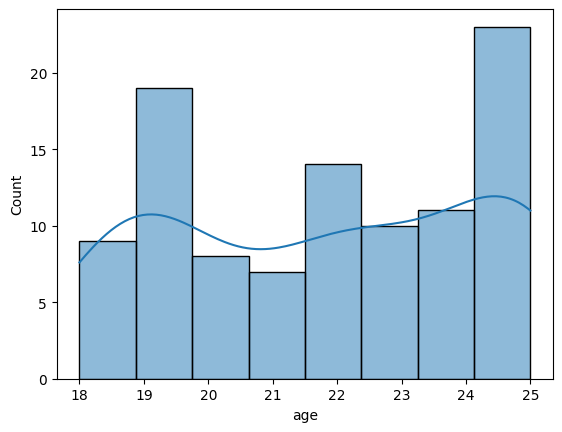

In [68]:
reverse_scaled=pd.DataFrame()
reverse_scaled[cols_scale]=scaler.inverse_transform(extreme_errors_df[cols_scale])

sns.histplot(reverse_scaled.age,kde=True)

In [69]:
reverse_scaled['age'].quantile(0.99)

np.float64(25.0)

# saving the model which is the linear regression

In [76]:
from joblib import dump

dump(best_model,'artifacts/model_young.joblib')

['artifacts/model_young.joblib']

In [77]:
scaler_with_cols={
    'scaler':scaler,
    'cols_to_scale':cols_scale,
}

scaler_with_cols

{'scaler': MinMaxScaler(),
 'cols_to_scale': ['age',
  'income_lakhs',
  'number_of_dependants',
  'insurance_plan',
  'income_level',
  'genetical_risk']}

In [78]:
dump(scaler_with_cols,'artifacts/scaler_young.joblib')

['artifacts/scaler_young.joblib']

In [86]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'genetical_risk', 'normalized_risk_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')